<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**:ahmadreza majlesara

**Student ID**:400101861


# ****Support Vector Machines****

In this notebook, you will implement SVM for three datasets. You will become more familiar with the Soft-Margin SVM and the Kernel trick, which makes SVM extremely powerful.

Before we start our implementation, you must be comfortable with the theoretical details of the Soft-Margin SVM as an optimization problem and be able to derive the dual formulation for this problem. In the next sections, you will solve the dual optimization problem for all datasets using the CVXPY library, which has been developed for solving convex optimization problems. To get more familiar with CVXPY programming, you can use this [link](https://www.cvxpy.org).

This is the primal formulation for the Soft-Margin SVM for linearly separable data with slack variables $\xi_i \ge 0$:

\begin{equation*}
\begin{aligned}
& {\text{min.}}
& & \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{N} \xi_i \\
& \text{s.t.}
& & y_i(w^T x_i + b) \geq 1 - \xi_i, \; i = 1, \ldots, N \\
& & & \xi_i \geq 0, \; i = 1, \ldots, N
\end{aligned}
\end{equation*}

Where $w$ represents the weight vector, $b$ is the bias term, and $C$ is the regularization parameter controlling the trade-off between a wide margin and misclassification.

**Theoretical Questions:**

1) Derive the dual optimization problem for the Soft-Margin SVM.

2) How do we calculate the weights and bias ($w$ and $b$) using the dual problem optimum points?

3) How do we classify new data points using the optimal weights and bias?

# Q1)

\begin{equation*}
\begin{aligned}
& \min_{w,b,\xi} & & \frac{1}{2} \| w \|^2 + C \sum_{i=1}^{N} \xi_i \\
& \text{s.t.} & & y_i (w^T x_i + b) \geq 1 - \xi_i, \quad i = 1, \ldots, N \\
& & & \xi_i \geq 0, \quad i = 1, \ldots, N
\end{aligned}
\end{equation*}



\begin{equation*}
\begin{aligned}
L(w, b, \xi, \alpha, \mu) = & \frac{1}{2} \| w \|^2 + C \sum_{i=1}^{N} \xi_i \\
& - \sum_{i=1}^{N} \alpha_i [y_i (w^T x_i + b) - 1 + \xi_i] \\
& - \sum_{i=1}^{N} \mu_i \xi_i
\end{aligned}
\end{equation*}

To find the dual, we take the partial derivatives of $L$ with respect to $w$, $b$, and $\xi_i$, and set them to zero.

\begin{equation*}
\frac{\partial L}{\partial w} = w - \sum_{i=1}^{N} \alpha_i y_i x_i = 0
\end{equation*}

$$
w = \sum_{i=1}^{N} \alpha_i y_i x_i
$$

$$
\frac{\partial L}{\partial b} = - \sum_{i=1}^{N} \alpha_i y_i = 0
$$

$$
\sum_{i=1}^{N} \alpha_i y_i = 0
$$



\begin{equation*}
\frac{\partial L}{\partial \xi_i} = C - \alpha_i - \mu_i = 0
\end{equation*}

Since $\mu_i \geq 0$ and $\xi_i \geq 0$, we get:
\begin{equation*}
\alpha_i \leq C
\end{equation*}


Substitute $w$ and $\xi_i$ back into the Lagrangian to express it in terms of $\alpha_i$.

\begin{equation*}
\begin{aligned}
L(w, b, \xi, \alpha, \mu) = & \frac{1}{2} \| \sum_{i=1}^{N} \alpha_i y_i x_i \|^2 + C \sum_{i=1}^{N} \xi_i \\
& - \sum_{i=1}^{N} \alpha_i \left[ y_i \left( \sum_{j=1}^{N} \alpha_j y_j x_j \right)^T x_i + b - 1 + \xi_i \right] \\
& - \sum_{i=1}^{N} \mu_i \xi_i
\end{aligned}
\end{equation*}



By simplifying, we obtain the dual formulation:
\begin{equation*}
\begin{aligned}
\max_{\alpha} & \sum_{i=1}^{N} \alpha_i - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_j x_i^T x_j \\
\text{s.t.} & \sum_{i=1}^{N} \alpha_i y_i = 0 \\
& 0 \leq \alpha_i \leq C, \quad i = 1, \ldots, N
\end{aligned}
\end{equation*}

# Q2)

To calculate the weights $ w $ and bias $ b $ using the optimum points from the dual problem, we follow these steps:



First, we solve the dual optimization problem to find the optimal Lagrange multipliers $ \alpha_i^* $:

\begin{equation*}
\begin{aligned}
\max_{\alpha} & \sum_{i=1}^{N} \alpha_i - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_j x_i^T x_j \\
\text{s.t.} & \sum_{i=1}^{N} \alpha_i y_i = 0 \\
& 0 \leq \alpha_i \leq C, \quad i = 1, \ldots, N
\end{aligned}
\end{equation*}



Once we have the optimal $ \alpha_i^* $, we can calculate the weight vector $ w $ using the following equation:

\begin{equation*}
w = \sum_{i=1}^{N} \alpha_i^* y_i x_i
\end{equation*}

This is derived from the partial derivative of the Lagrangian with respect to $ w $:

\begin{equation*}
\frac{\partial L}{\partial w} = w - \sum_{i=1}^{N} \alpha_i y_i x_i = 0 \quad \Rightarrow \quad w = \sum_{i=1}^{N} \alpha_i y_i x_i
\end{equation*}



To find the bias $ b $, we use the KKT (Karush-Kuhn-Tucker) conditions. For the support vectors, which are the data points where $ 0 < \alpha_i^* < C $, the corresponding KKT condition is:

\begin{equation*}
y_i (w^T x_i + b) = 1 - \xi_i
\end{equation*}

Since $ \xi_i $ is zero for the support vectors that lie exactly on the margin (i.e., $ y_i (w^T x_i + b) = 1 $), we can select any support vector $x_i $ with $ 0 < \alpha_i^* < C $ and solve for $ b $:

\begin{equation*}
b = y_i - w^T x_i
\end{equation*}

However, to improve numerical stability, we typically average over all such support vectors:

\begin{equation*}
b = \frac{1}{|S|} \sum_{i \in S} \left( y_i - w^T x_i \right)
\end{equation*}

where $ S $ is the set of indices of the support vectors.

# Q3)

To classify new data points using the optimal weights ($w$) and bias ($b$) obtained from the Support Vector Machine (SVM) training process first we compute the decision function meaning For a new data point $x_{\text{new}}$, calculate the decision function $f(x_{\text{new}})$ using the optimal weights and bias. The decision function is given by:
   
   $f(x_{\text{new}}) = w^T x_{\text{new}} + b$
   
then Determine the Class Label for the new data point based on the sign of the decision function:
   - If $f(x_{\text{new}}) \geq 0$, classify $x_{\text{new}}$ as belonging to the positive class (typically labeled as +1).
   - If $f(x_{\text{new}}) < 0$, classify $x_{\text{new}}$ as belonging to the negative class (typically labeled as -1).


Sometimes, the data is not linearly separable. Therefore, the previous formulation of the Soft-Margin SVM does not give a good accuracy for the classification problem. The Kernel trick is a technique used in such situations. Consider $x$ as your input features with dimension $p$. One can use function $\phi: R^p → R^d$ to map the input features to another space with dimension $d$. Finding good $\phi$ such that data points become near linearly separable makes the previous formulation of the problem and its dual useful by replacing $\phi(x_i)$ for $x_i$ in the problem definition. The function $\phi(x)$ can even be a mapping to an infinite-dimensional space.

If you have found the correct dual form of the Soft-Margin SVM in the previous formulation, you can see that the terms $x_i^T x_j$ will appear in the problem formulation and the prediction rule. These terms will be replaced with $\phi(x_i)^T \phi(x_j)$ when we use $\phi$ as our feature mapping function. Given a feature mapping $\phi$ we define its corresponding **Kernel** to be:

\begin{equation*}
\begin{aligned}
& K(x, z) = \phi(x)^T \phi(z)
\end{aligned}
\end{equation*}

Hence, in the dual optimization problem and the prediction rule of the Soft-Margin SVM, we can replace all terms in the form $x^T z$ with $K(x, z)$. This technique is called the Kernel trick.

Now, given $\phi$, we could easily compute $K(x,z)$ by finding $\phi(x)$ and $\phi(z)$ and taking their inner product. But what’s more interesting is that often, $K(x,z)$ may be very inexpensive to calculate, even though $\phi(x)$ itself may be very expensive to calculate (perhaps because it is an extremely high-dimensional vector). Check Stanford's CS229 [notes](https://see.stanford.edu/materials/aimlcs229/cs229-notes3.pdf) on SVM and the Kernel trick for more details and examples.

## Libraries

Here are some useful libraries for the implementation. You can add or remove any libraries as you wish. Note that you cannot use sklearn or similar libraries for implementation.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import cvxpy as cp

## **Dataset Exploration**

In this notebook, you'll be working with three datasets, specifically named "DF1.csv", "DF2.csv", and "DF3.csv". Each dataset entry is composed of a 2-dimensional feature vector and a label, which is either "1" or "-1". The primary objective of this notebook is to leverage SVM to develop a robust classifier for each dataset.

You are given three kernels as follows:



1.   Linear Kernel: $K(x, z) = x^T z$
2.   Polynomial Kernel of degree 2: $K(x, z) = (1 + ∑_{i = 1}^{p} x_i z_i)^2$, where $p$ is the dimension of the feature space.
3.   RBF Kernel: $K(x, z) = e^{-\frac{||x-z||_2^2}{2σ^2}}$

Before implementing, you must choose the correct kernel for each dataset. Note that each kernel must be used exactly for one dataset. Therefore, you cannot use one of the kernels twice. As a part of our grading scheme, what matters with respect to accuracy is the sum of the accuracies you reach for all three datasets, and the accuracy of each model does not have any separate score. Thus, it would help if you chose the most appropriate kernel for each dataset so that all datasets reach a reasonably good accuracy.





Load all datasets and show the first 5 rows of each.

In [4]:
df1 = pd.read_csv('DF1.csv')
df2 = pd.read_csv('DF2.csv')
df3 = pd.read_csv('DF3.csv')

print("df1 data:")
display(df1.head())
print("df2 data:")
display(df2.head())
print("df3 data:")
display(df3.head())

df1 data:


,x1,x2,y
0,6.462652,5.121478,-1
1,-6.586541,-7.721287,1
2,9.239683,-8.595738,-1
3,4.250052,2.143755,1
4,8.219779,-3.609733,-1


df2 data:


,x1,x2,y
0,2.937145,77.102291,1
1,-0.029344,44.802353,1
2,5.868818,44.595757,-1
3,8.609281,49.223945,-1
4,7.763276,-14.340750,-1


df3 data:


,x1,x2,y
0,-0.517768,-0.466158,-1
1,0.940985,0.235175,1
2,-0.470720,0.917120,1
3,0.712716,-0.097401,-1
4,-0.608773,-0.107034,-1


Use the following function to visualize the datapoints for all datasets.

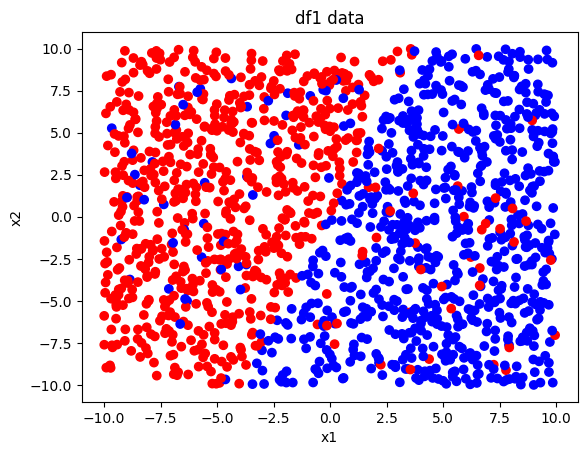

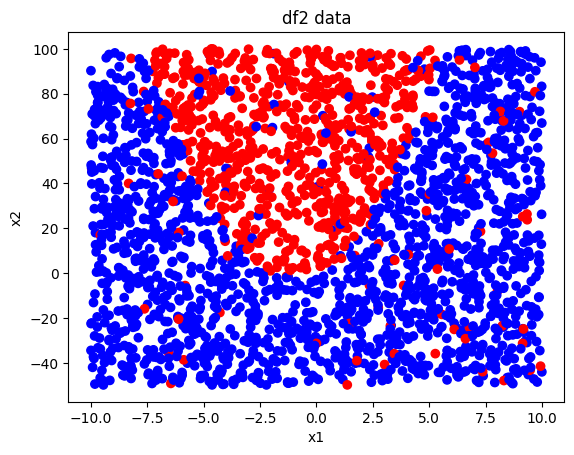

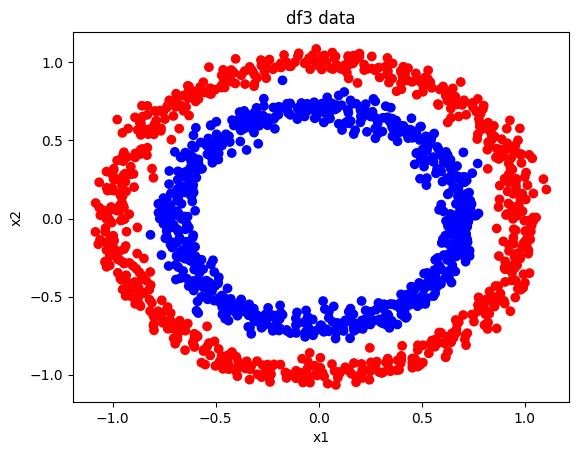

In [8]:
def visualize_data(X, y, title):
  col = []
  for i in range(len(y)):
    if y[i] == 1:
      col.append('red')
    else:
      col.append('blue')
  plt.scatter(X[ : , 0], X[ : , 1], color = col)
  plt.title(title)
  plt.xlabel('x1')
  plt.ylabel('x2')

  plt.show()

visualize_data(df1[['x1', 'x2']].values, df1['y'].values, 'df1 data')
visualize_data(df2[['x1', 'x2']].values, df2['y'].values, 'df2 data')
visualize_data(df3[['x1', 'x2']].values, df3['y'].values, 'df3 data')


**Theoretical Question:**

Which kernel will you use for each dataset? Justify your answer.

Note: your implementation must follow your choice here. Otherwise, you do not recieve any points for your implemetation.

1. **DF1**:
   - **Kernel**: Linear Kernel
   - **Justification**: The data points appear to be linearly separable. The boundary between the two classes can be approximated by a straight line. Therefore, the Linear Kernel is appropriate.

2. **DF2**:
   - **Kernel**: Polynomial Kernel
   - **Justification**: The data points show a more complex, but still structured, boundary. This suggests that a polynomial decision boundary could be effective. A Polynomial Kernel of degree 2 can capture the polynomial relationships present in this dataset.

3. **DF3**:
   - **Kernel**: RBF Kernel
   - **Justification**: The data points form concentric circles, indicating a non-linear and complex boundary. The RBF (Radial Basis Function) Kernel is well-suited for such non-linear patterns as it can handle more intricate relationships in the data.


## Dataset one (DF1.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [11]:
X1 = df1.iloc[:, :-1].values
y1 = df1.iloc[:, -1].values

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

print("Training set shape:", X1_train_scaled.shape, y1_train.shape)
print("Testing set shape:", X1_test_scaled.shape, y1_test.shape)

Training set shape: (1180, 2) (1180,)
Testing set shape: (296, 2) (296,)


Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [18]:
n_samples = X1_train_scaled.shape[0]
alpha = cp.Variable(n_samples)
K = np.dot(X1_train_scaled, X1_train_scaled.T)

Y = np.outer(y1_train, y1_train)
P = np.multiply(Y, K)
P = 0.5 * (P + P.T)
eigvals = np.linalg.eigvalsh(P)
if np.any(eigvals < 0):
    P += np.eye(P.shape[0]) * (-np.min(eigvals) + 1e-5)

objective = cp.Maximize(cp.sum(alpha) - 0.5 * cp.quad_form(alpha, P))
constraints = [alpha >= 0, alpha <= 10, cp.sum(cp.multiply(alpha, y1_train)) == 0]
problem = cp.Problem(objective, constraints)
problem.solve(solver=cp.SCS)

alpha_opt = alpha.value
support_vectors = alpha_opt > 1e-5

weights = np.sum((alpha_opt[support_vectors] * y1_train[support_vectors])[:, None] * X1_train_scaled[support_vectors], axis=0)

bias = np.mean(y1_train[support_vectors] - X1_train_scaled[support_vectors] @ weights)

support_vector_indices = np.where(alpha_opt > 1e-5)[0]
print(f"Number of support vectors: {len(support_vector_indices)}")
print(f"Support vector indices: {support_vector_indices}")

print("Weights:", weights)
print("Bias:", bias)

Number of support vectors: 362
Support vector indices: [   0    5   13   20   21   24   28   30   34   35   41   42   43   45
   47   53   55   66   70   71   72   73   75   76   77   79   82   89
   96   98  100  102  109  111  112  113  118  121  126  134  137  143
  145  153  155  158  159  161  162  165  169  170  171  172  175  179
  180  186  192  196  197  199  205  206  210  212  215  219  223  224
  225  227  231  232  240  243  245  253  259  262  267  270  273  275
  277  280  284  286  292  300  301  306  309  312  313  327  330  334
  337  342  345  351  358  363  365  369  370  372  374  377  382  391
  394  402  403  407  409  410  412  416  418  421  426  429  431  433
  435  438  439  445  446  449  453  470  472  473  474  477  479  482
  485  489  490  491  493  501  502  503  509  510  511  515  517  522
  527  531  543  547  549  551  554  559  560  565  566  568  572  573
  574  575  576  589  590  592  597  602  604  613  614  616  619  622
  623  627  629  630  

Predict the class of each entry in the test set using your learned model.

In [22]:
y_pred = []
for i in range(len(X1_test_scaled)):
    y_pred.append(np.sign(np.dot(X1_test_scaled[i], weights) + bias))

print("Predicted classes for the test set:", y_pred)

Predicted classes for the test set: [-1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0,

Use classification_report function (from sklearn) to get the accuracy of your model.

In [24]:
report = classification_report(y1_test, y_pred)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

          -1       0.92      0.93      0.92       148
           1       0.93      0.92      0.92       148

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296



## Dataset two (DF2.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [26]:
X2 = df2.iloc[:, :-1].values
y2 = df2.iloc[:, -1].values

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

print("Training set shape:", X2_train_scaled.shape, y2_train.shape)
print("Testing set shape:", X2_test_scaled.shape, y2_test.shape)


Training set shape: (1980, 2) (1980,)
Testing set shape: (496, 2) (496,)


Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [27]:
n_samples = X2_train_scaled.shape[0]
alpha = cp.Variable(n_samples)
K = (1 + np.dot(X2_train_scaled, X2_train_scaled.T)) ** 2

Y = np.outer(y2_train, y2_train)
P = np.multiply(Y, K)
P = 0.5 * (P + P.T)
eigvals = np.linalg.eigvalsh(P)
if np.any(eigvals < 0):
    P += np.eye(P.shape[0]) * (-np.min(eigvals) + 1e-5)

objective = cp.Maximize(cp.sum(alpha) - 0.5 * cp.quad_form(alpha, P))
constraints = [alpha >= 0, alpha <= 10, cp.sum(cp.multiply(alpha, y2_train)) == 0]
problem = cp.Problem(objective, constraints)
problem.solve(solver=cp.SCS)
alpha_opt = alpha.value
support_vectors = alpha_opt > 1e-5
bias_terms = y2_train[support_vectors] - np.sum((alpha_opt * y2_train)[:, None] * K[:, support_vectors], axis=0)
bias = np.mean(bias_terms)
support_vector_indices = np.where(alpha_opt > 1e-5)[0]

print(f"Number of support vectors: {len(support_vector_indices)}")
print(f"Support vector indices: {support_vector_indices}")

print("Bias:", bias)

Number of support vectors: 692
Support vector indices: [   1    4    6    8   14   18   22   30   31   32   33   36   38   40
   41   42   44   51   52   56   58   67   69   71   72   73   74   78
   82   83   84   88   91   97   99  101  103  104  107  109  112  115
  118  121  125  133  135  137  146  147  148  151  158  159  162  176
  180  181  184  189  194  195  198  205  207  210  211  212  213  221
  222  224  225  227  228  229  231  232  234  235  237  240  241  242
  243  246  248  249  251  256  262  263  264  266  271  278  280  288
  289  299  300  303  304  306  311  313  314  324  330  332  333  334
  342  346  347  348  349  352  353  357  364  365  368  373  374  375
  376  380  382  384  387  389  390  392  395  398  402  403  406  407
  408  411  415  419  420  421  423  425  429  436  437  444  446  448
  450  458  459  463  465  474  477  479  480  482  483  486  487  489
  491  493  500  503  505  507  512  513  521  523  527  531  535  537
  538  540  541  542  

Predict the class of each entry in the test set using your learned model.

In [34]:
def decision_function(X, support_vectors, alpha_opt, y_train, bias):
    K = (1 + np.dot(support_vectors, X.T)) ** 2
    decision_values = np.sum((alpha_opt * y_train)[:, None] * K, axis=0) + bias
    return decision_values

def predict(X, support_vectors, alpha_opt, y_train, bias):
    decision_values = decision_function(X, support_vectors, alpha_opt, y_train, bias)
    return np.sign(decision_values)

X2_train_support = X2_train_scaled[support_vectors]

y2_pred = predict(X2_test_scaled, X2_train_support, alpha_opt[support_vectors], y2_train[support_vectors], bias)

print("Predicted classes for the test set:", y2_pred)


Predicted classes for the test set: [-1. -1. -1. -1. -1. -1.  1. -1.  1. -1.  1.  1. -1. -1. -1. -1. -1. -1.
 -1.  1. -1. -1. -1. -1.  1. -1. -1. -1.  1.  1. -1.  1.  1.  1. -1.  1.
  1.  1. -1. -1. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1. -1. -1. -1.  1.
 -1.  1. -1.  1.  1.  1.  1.  1. -1. -1.  1. -1. -1. -1.  1.  1.  1. -1.
 -1. -1.  1.  1.  1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1. -1.  1. -1.
 -1. -1.  1. -1. -1. -1. -1.  1. -1.  1.  1.  1. -1. -1. -1. -1. -1.  1.
 -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1. -1.
 -1.  1.  1. -1.  1.  1.  1.  1. -1. -1. -1. -1.  1. -1.  1. -1.  1. -1.
 -1. -1. -1.  1.  1.  1.  1. -1.  1. -1. -1.  1.  1. -1. -1. -1. -1. -1.
  1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1. -1.  1.  1.  1.  1.  1. -1.
 -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.  1. -1.  1. -1.  1. -1. -1. -1.
 -1. -1. -1.  1. -1.  1. -1. -1.  1.  1. -1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1.  1. -1. -1.  1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1.
 -1. -1. -1.  1

Use classification_report function (from sklearn) to get the accuracy of your model.

In [36]:
report = classification_report(y2_test, y2_pred)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

          -1       0.94      0.92      0.93       336
           1       0.84      0.88      0.86       160

    accuracy                           0.91       496
   macro avg       0.89      0.90      0.90       496
weighted avg       0.91      0.91      0.91       496



## Dataset three (DF3.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [37]:
X3 = df3.iloc[:, :-1].values
y3 = df3.iloc[:, -1].values

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

scaler = StandardScaler()
X3_train_scaled = scaler.fit_transform(X3_train)
X3_test_scaled = scaler.transform(X3_test)

print("Training set shape:", X3_train_scaled.shape, y3_train.shape)
print("Testing set shape:", X3_test_scaled.shape, y3_test.shape)


Training set shape: (1167, 2) (1167,)
Testing set shape: (292, 2) (292,)


Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [39]:
def rbf_kernel(X1, X2, gamma):
    sq_dists = np.sum(X1**2, axis=1).reshape(-1, 1) + np.sum(X2**2, axis=1) - 2 * np.dot(X1, X2.T)
    return np.exp(-gamma * sq_dists)

gamma = 0.1
K = rbf_kernel(X3_train_scaled, X3_train_scaled, gamma)
n_samples = X3_train_scaled.shape[0]
alpha = cp.Variable(n_samples)

Y = np.outer(y3_train, y3_train)
P = np.multiply(Y, K)
P = 0.5 * (P + P.T)
P = cp.psd_wrap(P)

objective = cp.Maximize(cp.sum(alpha) - 0.5 * cp.quad_form(alpha, P))
constraints = [alpha >= 0, alpha <= 10, cp.sum(cp.multiply(alpha, y3_train)) == 0]
problem = cp.Problem(objective, constraints)
problem.solve(solver=cp.SCS)
alpha_opt = alpha.value
support_vectors = alpha_opt > 1e-5
bias_terms = y3_train[support_vectors] - np.sum((alpha_opt * y3_train)[:, None] * K[:, support_vectors], axis=0)
bias = np.mean(bias_terms)
support_vector_indices = np.where(alpha_opt > 1e-5)[0]


print(f"Number of support vectors: {len(support_vector_indices)}")
print(f"Support vector indices: {support_vector_indices}")

print("Bias:", bias)

Number of support vectors: 374
Support vector indices: [   5    8    9   12   13   14   16   18   25   26   29   41   43   44
   45   49   56   65   67   73   74   77   79   80   81   82   84   92
   94   96  118  121  124  129  131  135  137  140  147  157  160  161
  166  167  169  171  172  173  174  175  176  179  180  182  183  186
  187  190  193  195  201  209  210  212  225  229  230  231  234  237
  239  241  244  246  247  253  257  260  271  282  286  288  290  293
  298  300  301  307  309  314  315  316  318  320  321  325  330  331
  335  336  338  342  343  346  347  356  362  364  366  367  373  374
  377  383  386  389  391  395  396  406  410  411  424  425  428  436
  441  445  447  452  454  462  463  465  470  472  473  475  481  482
  483  484  485  496  501  508  512  513  517  518  519  520  521  522
  524  526  529  533  536  542  545  549  554  556  557  559  563  566
  567  572  576  582  583  584  591  592  596  597  598  600  601  602
  607  610  611  614  

Predict the class of each entry in the test set using your learned model.

In [40]:
def decision_function(X, support_vectors, alpha_opt, y_train, bias, gamma):
    K = rbf_kernel(support_vectors, X, gamma)
    decision_values = np.sum((alpha_opt * y_train)[:, None] * K, axis=0) + bias
    return decision_values

def predict(X, support_vectors, alpha_opt, y_train, bias, gamma):
    decision_values = decision_function(X, support_vectors, alpha_opt, y_train, bias, gamma)
    return np.sign(decision_values)

X3_train_support = X3_train_scaled[support_vectors]

y3_pred = predict(X3_test_scaled, X3_train_support, alpha_opt[support_vectors], y3_train[support_vectors], bias, gamma)

print("Predicted classes for the test set:", y3_pred)


Predicted classes for the test set: [ 1.  1.  1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1.  1. -1. -1.  1. -1. -1.  1.  1. -1. -1. -1. -1. -1.  1. -1.  1. -1.
 -1. -1. -1. -1. -1. -1.  1.  1. -1. -1.  1.  1.  1. -1. -1.  1. -1.  1.
  1.  1. -1. -1. -1. -1.  1.  1.  1. -1. -1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1.  1. -1. -1. -1.  1.  1.  1.  1. -1.  1.  1. -1. -1.
 -1. -1. -1.  1.  1. -1. -1.  1. -1.  1.  1.  1.  1. -1.  1. -1. -1. -1.
  1.  1.  1.  1. -1.  1.  1. -1. -1. -1. -1.  1. -1.  1. -1.  1. -1. -1.
 -1. -1.  1. -1.  1. -1.  1.  1.  1. -1. -1. -1. -1.  1.  1.  1. -1. -1.
 -1.  1. -1.  1. -1. -1.  1.  1. -1.  1.  1. -1.  1.  1. -1.  1.  1.  1.
 -1. -1. -1. -1.  1.  1.  1.  1.  1. -1.  1. -1. -1.  1.  1.  1.  1. -1.
  1. -1. -1.  1. -1. -1. -1.  1.  1. -1.  1.  1. -1. -1.  1.  1.  1. -1.
  1.  1. -1.  1. -1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.
 -1.  1.  1.  1. -1.  1. -1.  1.  1. -1. -1.  1.  1. -1. -1.  1. -1.  1.
  1. -1.  1.  1

Use classification_report function (from sklearn) to get the accuracy of your model.

In [41]:
report = classification_report(y3_test, y3_pred)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

          -1       1.00      0.99      0.99       152
           1       0.99      1.00      0.99       140

    accuracy                           0.99       292
   macro avg       0.99      0.99      0.99       292
weighted avg       0.99      0.99      0.99       292

